## NBA Spreads 

Author: Sahil Shah 

Description: 

Explore Against the Spread data from the 2017-2017 NBA season from Vegas Insider: 

Source: http://www.vegasinsider.com/nba/against-the-spread/


### Obtain the data 

Obtain and scrub the data with pandas

In [1]:
import pandas as pd

/Users/sds930/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sds930/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
raw_dataframe = pd.read_csv("../data/nba-against-the-spread.csv")

In [7]:
raw_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
Unnamed: 0            31 non-null object
Straight-Up           31 non-null object
Unnamed: 2            31 non-null object
Unnamed: 3            31 non-null object
Against The Spread    31 non-null object
Unnamed: 5            31 non-null object
Unnamed: 6            31 non-null object
Over/Under            31 non-null object
Unnamed: 8            31 non-null object
Unnamed: 9            31 non-null object
dtypes: object(10)
memory usage: 2.5+ KB


### Scrub the data 

Build scrubbed_dataframe by looping over each column, splitting strings,  and then casting to numeric type, renaming column names etc and save to a file to load  and analzye 

In [8]:
# str.split works on Series (i.e. each column of the data frame) so loop over columns and concat
# b/c split apply combine group by or apply function's didn't work and there's only 9 columns

scrubbed_dataframe = raw_dataframe.iloc[:,0] # initalize scrubbed data frame 

for column_position in list(range(1,10)):

    scrubbed_dataframe = pd.concat([scrubbed_dataframe,
                                    raw_dataframe.iloc[:,column_position].str.split('-', expand = True)], 
                                    axis=1)

Drop first row of "Team Total None None Home" and name columns 

In [9]:
scrubbed_dataframe = scrubbed_dataframe.drop(scrubbed_dataframe.index[0])

In [10]:
header =                     ["Team",
                              "SU_T_W",
                              "SU_T_L",
                              "SU_T_D",
                              "SU_H_W",
                              "SU_H_L",
                              "SU_H_D",
                              "SU_A_W",
                              "SU_A_L",
                              "SU_A_D",
                              "AS_T_W",
                              "AS_T_L",
                              "AS_T_D",
                              "AS_H_W",
                              "AS_H_L",
                              "AS_H_D",
                              "AS_A_W",
                              "AS_A_L",
                              "AS_A_D",
                              "OU_T_W",
                              "OU_T_L",
                              "OU_T_D",
                              "OU_H_W",
                              "OU_H_L",
                              "OU_H_D",
                              "OU_A_W",
                              "OU_A_L",
                              "OU_A_D"]

In [11]:
scrubbed_dataframe.columns = header

Convert to integer and divide by total number of games 82

In [12]:
temp_dataframe = scrubbed_dataframe.iloc[:,1:].apply(pd.to_numeric)/82

In [13]:
scrubbed_dataframe.iloc[:,1:] = temp_dataframe

In [23]:
scrubbed_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 28 columns):
Team      30 non-null object
SU_T_W    30 non-null object
SU_T_L    30 non-null object
SU_T_D    30 non-null object
SU_H_W    30 non-null object
SU_H_L    30 non-null object
SU_H_D    30 non-null object
SU_A_W    30 non-null object
SU_A_L    30 non-null object
SU_A_D    30 non-null object
AS_T_W    30 non-null object
AS_T_L    30 non-null object
AS_T_D    30 non-null object
AS_H_W    30 non-null object
AS_H_L    30 non-null object
AS_H_D    30 non-null object
AS_A_W    30 non-null object
AS_A_L    30 non-null object
AS_A_D    30 non-null object
OU_T_W    30 non-null object
OU_T_L    30 non-null object
OU_T_D    30 non-null object
OU_H_W    30 non-null object
OU_H_L    30 non-null object
OU_H_D    30 non-null object
OU_A_W    30 non-null object
OU_A_L    30 non-null object
OU_A_D    30 non-null object
dtypes: object(28)
memory usage: 6.8+ KB


### Vertical plot of AS_T_W against 0.5 for each team?

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Template code from : https://seaborn.pydata.org/examples/pairgrid_dotplot.html

/Users/sds930/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


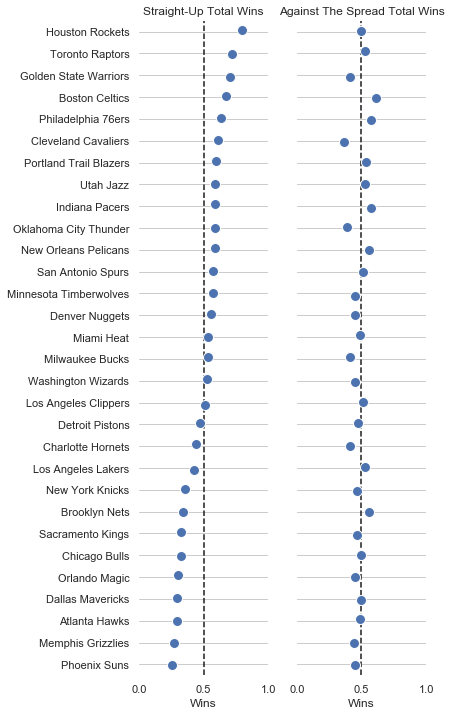

In [22]:
sns.set(style="whitegrid")


# Make the PairGrid
grid = sns.PairGrid(scrubbed_dataframe.sort_values("SU_T_W", ascending=False),
                 x_vars=scrubbed_dataframe.columns[[1,10]], 
                 y_vars=["Team"], 
                 size = 10,
                 aspect=0.25)

# Draw a dot plot using the stripplot function
grid.map(sns.stripplot, 
      size=10, 
      orient="h", 
      linewidth=1, 
      edgecolor="w")


grid.set(xlim=(0, 1), xlabel="Wins", ylabel="")


# Use semantically meaningful titles for the columns
titles = ["Straight-Up Total Wins", "Against The Spread Total Wins"]

for ax, title in zip(grid.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    
    ax.axvline(0.5, linestyle='--', color='k') # vertical lines

    
sns.despine(left=True, bottom=True)